<h1 style="font-size:180%; color:purple;"><i><b>OpenFood: Data cleaning</b></i></h1>

### Import Libraries

In [51]:
import numpy as np 
import pandas as pd 
import os

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Absolute and Relative paths

In [52]:
dirname = os.path.dirname('../input/openfood/')
filename = os.path.join(dirname, 'data_385k.pkl')

In [53]:
filename

'../input/openfood/data_385k.pkl'

### Import the data as a pandas DataFrame into your notebook.

 Load it using the pandas read_pickle function and set the compression parameter to ‘zip’. 
 
Display a few entries.
 

In [54]:
df = pd.read_pickle('../input/openfood/data_385k.pkl', compression='zip')
df.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### B1. Duplicated Products

Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

Let’s check how many exact duplicates our dataset contains.

In [55]:
#Find a number of duplicated rows: 10500

df.duplicated().sum()

10500

### Find the duplicated rows

Find the duplicated rows, we can select the entries corresponding to the True values using boolean indexing.

In [56]:
#Before dropping duplicates, our dataset shape was 385384 rows x 99 columns

df.loc[df.duplicated(), :]

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
374884,0.0,7613404363317,NaN,NaN,17.0,60.00,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374885,0.0,7613269343509,NaN,NaN,1.0,1.80,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374886,0.0,2110012004502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374887,0.0,2159171001007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374888,0.0,7624841230186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385379,0.0,7640145040283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385380,0.0,7640147023628,850.0,mg,48.6,9.72,g,NaN,NaN,NaN,...,45.0,mg,10.5,mg,500.0,mg,NaN,NaN,37.5,mg
385381,0.0,3046920021593,NaN,NaN,22.0,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385382,0.0,4044889004335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the duplicated rows
It returns a new DataFrame with the duplicated rows removed.

Before dropping duplicates, our dataset shape was 385384 rows x 99 columns (above). After dropping them (10500) we have 374884 rows x 99 columns (below).

In [57]:
#After dropping them we have 374884 rows x 99 columns

#Drop duplicates  Unfortunately, it seems to drop however the shape remains the same initial. 

#df.drop_duplicates()

####  By specifying inplace=True, the dataframe is modified.

See documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

You should add df.drop_duplicates(subset=['id'], keep='last', inplace=True). If you don't do this, only a copy is returned. By **specifying inplace=True, the dataframe is modified.**

See documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [58]:
df.drop_duplicates(subset=['id'], keep='last', inplace=True)

#### Our df shape after dropping duplicates: (374884, 99) 

In [59]:
df.shape

(374884, 99)

<h1><span class="label label-default" style="background-color:black;border-radius:100px 100px; font-weight: bold; font-family:Garamond; font-size:20px; color:#03e8fc; padding:10px">Handle a huge amount of Missing values? One bite at a time</span></h1><br>


How do you want us to handle this huge amount of Missing values? One bite at a time.

Same way you'd eat an elephant... one bite at a time.

"Warrick Brown: How do you want us to handle this?"

"Gil Grissom: Same way you'd eat an elephant... one bite at a time."  On CSI Vegas.

https://www.quotes.net/mquote/696432

### B2 a) Create a table that shows both the number and the percentage of missing values.

Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest. Make sure all the column names are visible.

Below, a function to create a Missing values table and respective percentage.

In [60]:
#By Will Koehrsen https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

**Table: Number and the Percentage** of missing values for all columns, descending order.

In [61]:
#Will Koehrsen https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 99 columns.
There are 88 columns that have missing values.


,Missing Values,% of Total Values
sodium_per_portion,374131,99.8
fiber_insoluble_per_hundred,371375,99.1
fiber_insoluble_unit,371374,99.1
manganese_mn_per_hundred,371350,99.1
manganese_mn_unit,371347,99.1
...,...,...
fat_unit,29292,7.8
carbohydrates_per_hundred,26333,7.0
carbohydrates_unit,26056,7.0
protein_per_hundred,24395,6.5


#### Transpose the table missing and percent to show ALL column names

Make sure all the column names are visible. Since the task required to show ALL column names. I transposed the table. 

In [62]:
all_missing = df_missing.T
all_missing.head()

,sodium_per_portion,fiber_insoluble_per_hundred,fiber_insoluble_unit,manganese_mn_per_hundred,manganese_mn_unit,copper_cu_per_hundred,copper_cu_unit,fiber_soluble_per_hundred,fiber_soluble_unit,folic_acid_per_hundred,...,energy_per_hundred,energy_kcal_per_hundred,energy_unit,product_name_en,fat_per_hundred,fat_unit,carbohydrates_per_hundred,carbohydrates_unit,protein_per_hundred,protein_unit
Missing Values,374131.0,371375.0,371374.0,371350.0,371347.0,371273.0,371273.0,371057.0,371055.0,370428.0,...,36313.0,36310.0,36125.0,33165.0,29624.0,29292.0,26333.0,26056.0,24395.0,24078.0
% of Total Values,99.8,99.1,99.1,99.1,99.1,99.0,99.0,99.0,99.0,98.8,...,9.7,9.7,9.6,8.8,7.9,7.8,7.0,7.0,6.5,6.4


### B2 b) Visualizing Missing with MissingNo

"In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not."

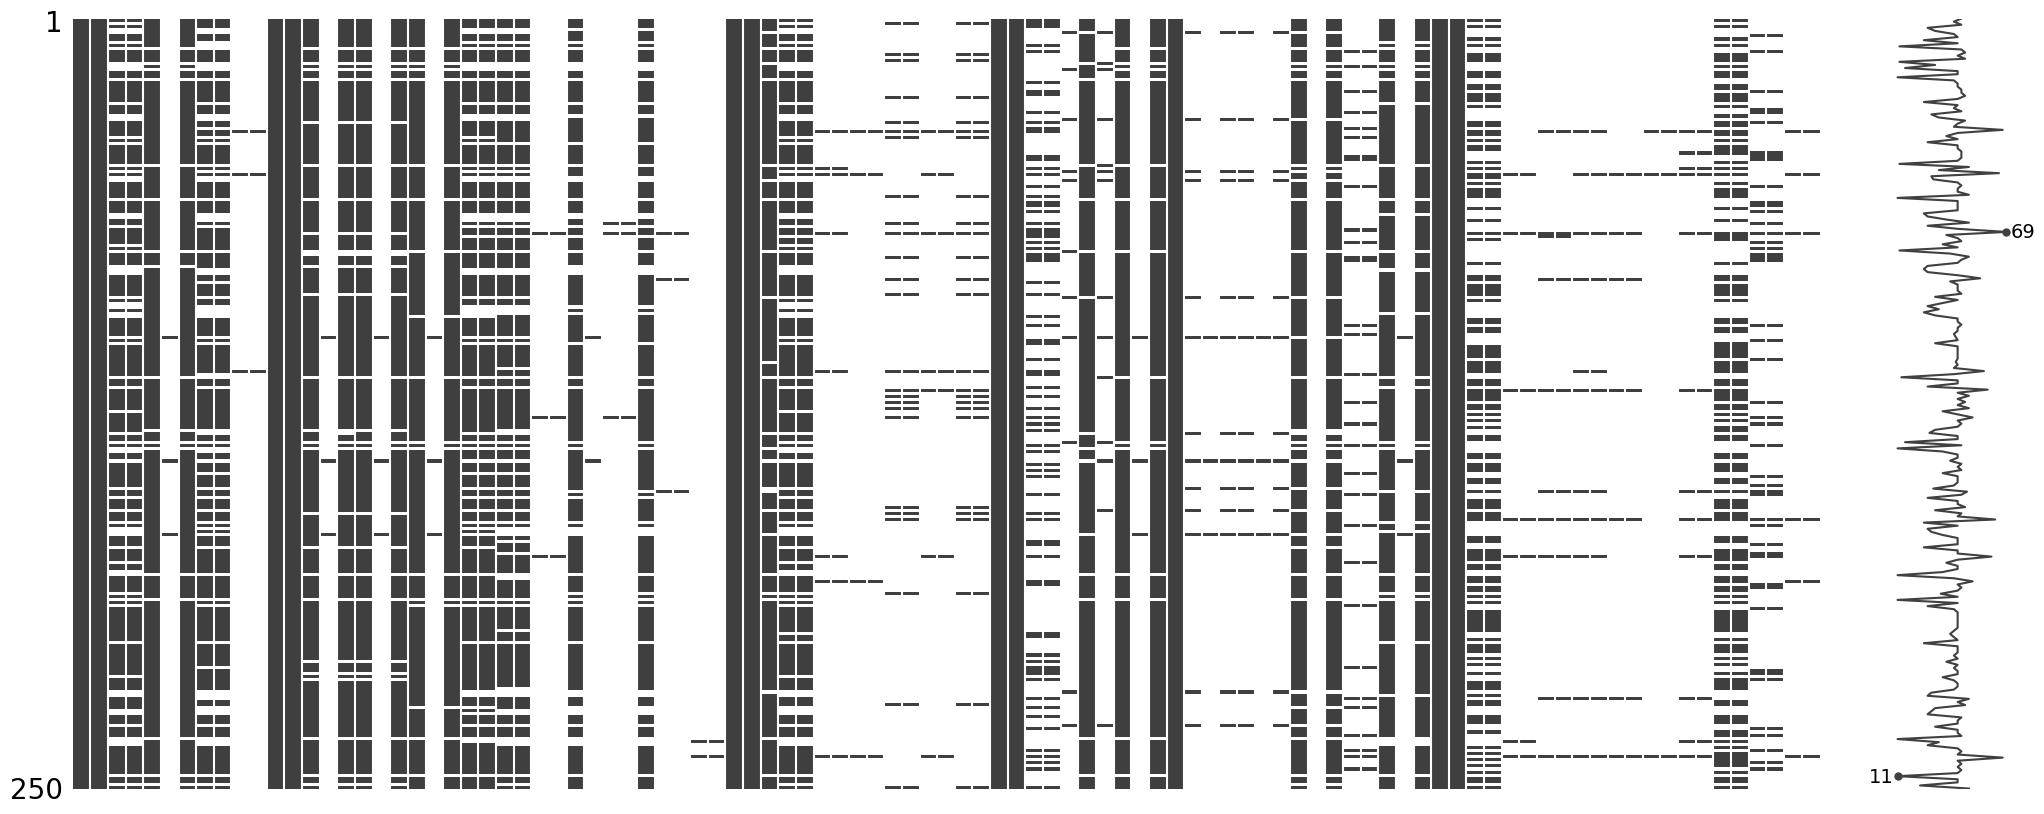

In [63]:
# visualizing the missing values using missingno

import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250));

### Insights from MissingNo 

Explanation adapted from Resident Mario https://github.com/ResidentMario/missingno?tab=readme-ov-file

Above, black is completely populated. We have many white which means plenty of missing values.

Black lines indicate the presence of data, while white lines represent the absence of data.

The sparkline at right summarizes the general shape of the data completeness and the points out the rows with the maximum (69) and minimum (11) nullity in the dataset.

This visualization didn't accommodate well our 99 labelled variables. (It'd do with 50 variables, Marília's opinion). Past that range labels begin to **overlap or become unreadable**, and by default large displays omit them. Therefore, we didn't get even the name of the columns on top of the chart. Which won't help to find if we have rows that are completely empty.

## B2 c) Create 4 line Plots or bar charts showing percentage of missing

" In task A5 we created 4 lists for the _per_hundred, _per_portion and _unit columns, and the remaining columns. Use these 4 lists to create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames)"

#### New Dataframe: Columns by Suffix per_hundred

In [64]:
#https://cmdlinetips.com/2019/04/how-to-select-columns-using-prefix-suffix-of-column-names-in-pandas/

#New Dataframe: Columns by Suffix per_hundred

#df.filter(regex='per_hundred$',axis=1).head()

per_hundred= df.filter(regex='per_hundred$',axis=1).head()
per_hundred.head(2)

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
0,NaN,75.0,NaN,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.5,NaN,NaN,242.0,1010.0,18.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Percent of Missing Values Columns with suffix per_hundred

On input 4 we have sub-dataframe per_hundred. Now, we'll define (sub-dataframe percent_missing1)the percent of missing values on per_hundred sub-dataframe, so that we'll be able to plot a Lineplot.

In [65]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
#Percent of Missing Values on suffix per_hundred Columns


percent_missing1 = per_hundred.isnull().sum() * 100 / len(per_hundred)
#percent_missing1.head()

#### Lineplot of per_hundred % missing values

**Observations:** Below, on Lineplot of per_hundred % missing values, we notice both an increase (plateaux on top) and decrease of missing values percents. However, variables WITHOUT that suffix weren't on that list, therefore I didn't include (e.g. created_at, updated_at) them on the chart. The **same happened** on the **next charts**.

If we had an independent variable (maybe create_at) and a dependent variable (suffix columns) the result would be better.

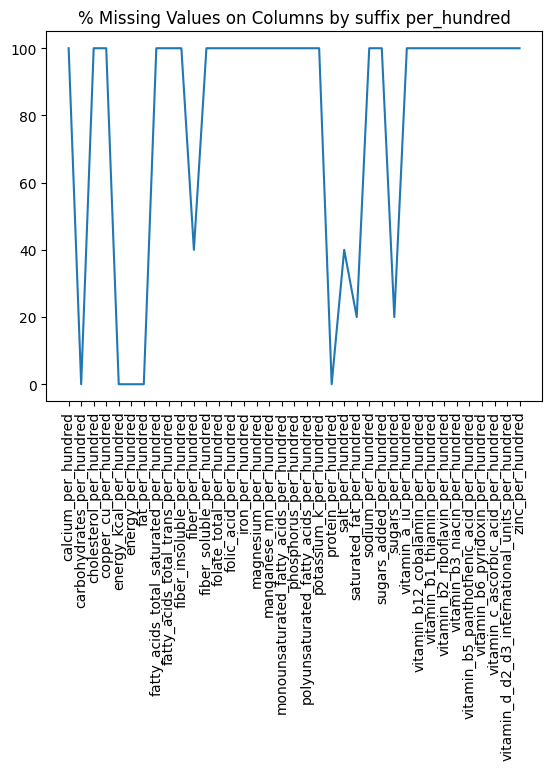

In [66]:
#Lineplot of per_hundred % missing values

sns.lineplot(data=percent_missing1)
plt.xticks(rotation=90) #45 overlapped
plt.title('% Missing Values on Columns by suffix per_hundred');

#### New Dataframe: Columns by Suffix per_portion

In [67]:
#New Dataframe: Columns by Suffix per_portion

#df.filter(regex='per_portion$',axis=1).head()

per_portion= df.filter(regex='per_portion$',axis=1).head()
per_portion.head(2)

,carbohydrates_per_portion,energy_kcal_per_portion,energy_per_portion,fat_per_portion,fiber_per_portion,protein_per_portion,salt_per_portion,saturated_fat_per_portion,sodium_per_portion,sugars_per_portion
0,37.50,179.0,150.0,0.21,NaN,5.50,NaN,NaN,NaN,NaN
1,1.13,181.0,758.0,13.50,0.0,14.25,0.38,8.25,NaN,1.13


#### Percent of Missing Values Columns with suffix per_portion

On input 5 we have sub-dataframe per_portion. Now, we'll define (sub-dataframe percent_missing2) the percent of missing values on per_portion sub-dataframe, so that we'll be able to plot a Lineplot.

In [68]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

percent_missing2 = per_portion.isnull().sum() * 100 / len(per_portion)
percent_missing2.head()

carbohydrates_per_portion    20.0
energy_kcal_per_portion      20.0
energy_per_portion           20.0
fat_per_portion              20.0
fiber_per_portion            40.0
dtype: float64

#### Lineplot of per_portion % of missing values

Percent of missing values suffix per_portion, we have a peak on satured_fat_per_portion (many missing values). And we got a plateau at the left bottom: carbohydrates, energy_kcal and energy (few missing (20%) as we saw on the previous output percentage numbers.

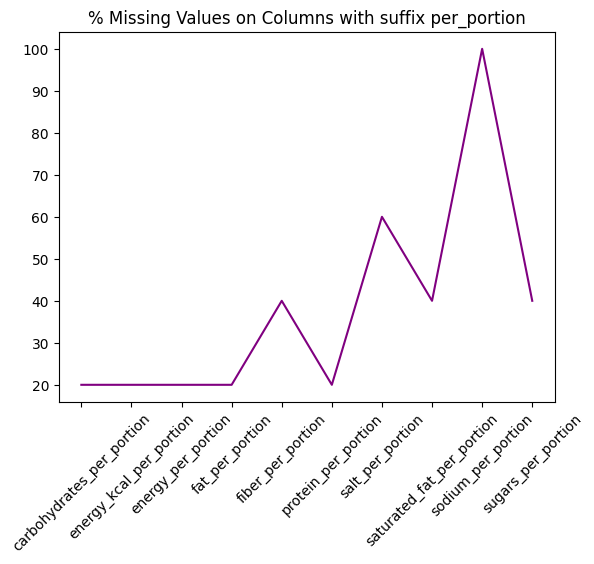

In [69]:
#Percent of Missing Values Columns with suffix per_portion

sns.lineplot(data=percent_missing2, color='purple')
plt.xticks(rotation=45)
plt.title('% Missing Values on Columns with suffix per_portion');

#### Percent of Missing Values Columns with suffix unit

On input 6 we have sub-dataframe unit. Now, we'll define (sub-dataframe percent_missing3) the percent of missing values on unit sub-dataframe, so that we'll be able to plot a Lineplot.

In [70]:
#New Dataframe:Columns by Suffix unit

#df.filter(regex='unit$',axis=1).head()

unit= df.filter(regex='unit$',axis=1).head()
unit.head(2)

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Percent of Missing Values Columns with suffix unit

On input 6 we have sub-dataframe unit. Now, we'll define (sub-dataframe percent_missing3) the percent of missing values on unit sub-dataframe, so that we'll be able to plot a Lineplot.

In [71]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

percent_missing3 = unit.isnull().sum() * 100 / len(unit)

#### Lineplot of unit percent of missing values

Percent of missing values suffix with unit, we have many plateaux on top (many missing values). We also observe an extreme increase in potassium_unit. And abrupt decreases at carbohydrates_unit, hundred_unit, fiber_unit (less abrupt), portion_unit, protein unit and unit.

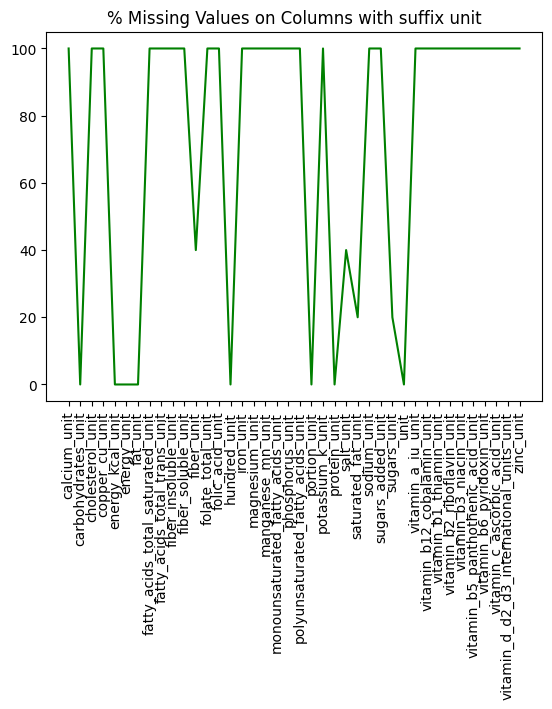

In [72]:
#Percent of Missing Values Columns with suffix unit

sns.lineplot(data=percent_missing3, color='g')
plt.xticks(rotation=90)
plt.title('% Missing Values on Columns with suffix unit');

#### New dataframe other_cols

In [73]:
#Don't forget the double brackets

other_cols = df[['alcohol_by_volume', 'barcode', 'country', 'created_at', 'id', 'ingredients_en', 'portion_quantity', 'product_name_de', 'product_name_en', 'product_name_fr', 'quantity', 'updated_at']]

#### Percent of Missing Values Columns with suffix other_cols (remaining columns)

On input 7 we have sub-dataframe unit. Now, we'll define (sub-dataframe percent_missing4) the percent of missing values on unit sub-dataframe, so that we'll be able to plot a Lineplot.

In [74]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

percent_missing4 = other_cols.isnull().sum() * 100 / len(other_cols)

#### Lineplot of other_cols percent of missing values

Percent of Missing values Suffix with other_cols (remaining columns), we have an extreme increase on product_name_de (deutsch/german products) and product_name_fr (french products). And decreases at product_name_en (english products)

The bottom plateau on the left indicates few missing on those initial features (alcohol_by_volume, barcode, country, created_at and id. We noticed the same kind of plateau on the right bottom: updated_at column/feature.

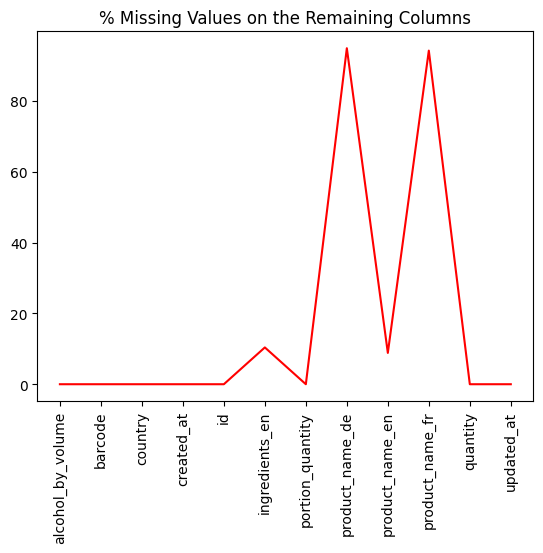

In [75]:
##Percent of Missing Values Columns with suffix other_cols (Remaining columns)

sns.lineplot(data=percent_missing4, color='r')
plt.xticks(rotation=90)
plt.title('% Missing Values on the Remaining Columns');

## B3 Handling Missing Values

"Now that you know the extent of missing values in the data, it is time to address them. Your goal is to keep as much data as possible in your data frame. At each step report how many samples and features remain."

#### B3 a) Remove rows and columns that are completely empty
"As a first step, remove rows and columns that are completely empty (if there is any)."

According to task B2a: Table with number/percentage of missing values, there are No rows/columns completely empty.

#### Missingno: per_hundred suffix columns
msno.bar is a simple visualization of nullity by columns with per_hundred suffix. The missing are on the white. Red are filled. I changed just the bar's color.

MissingNo sample (here is 5) only accept values below missing. **We won't drop any** per_hundred suffix column.

https://github.com/ResidentMario/missingno/blob/master/README.md

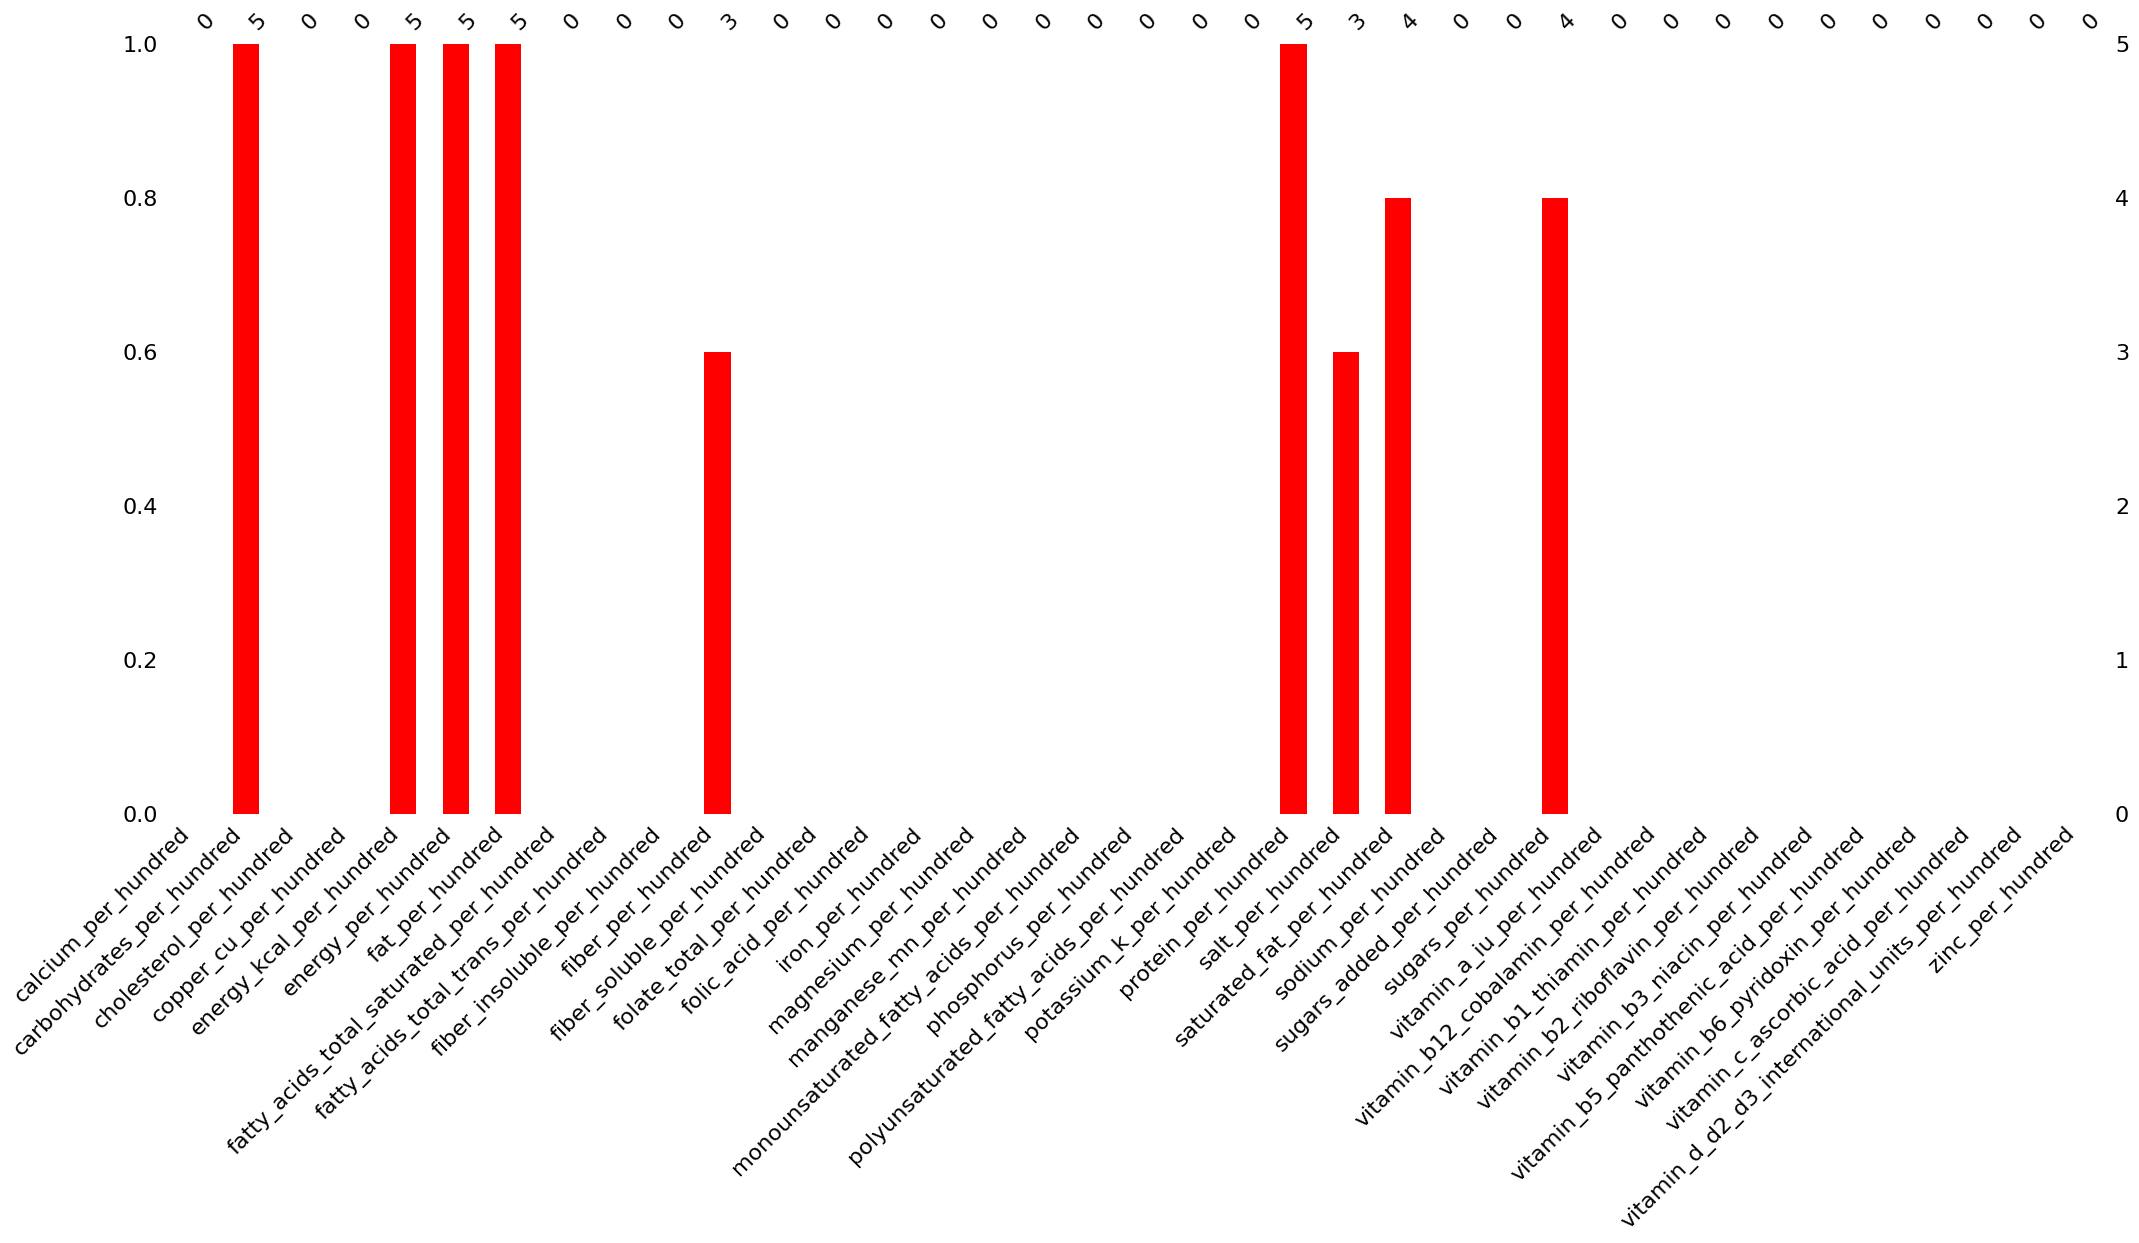

In [76]:
# visualizing the missing values using missingno
import missingno as msno

msno.bar(per_hundred.sample(5), color='red');

#### Missingno: unit suffix columns

MissingNo sample only accept values below missing. **We won't drop** any unit suffix column.

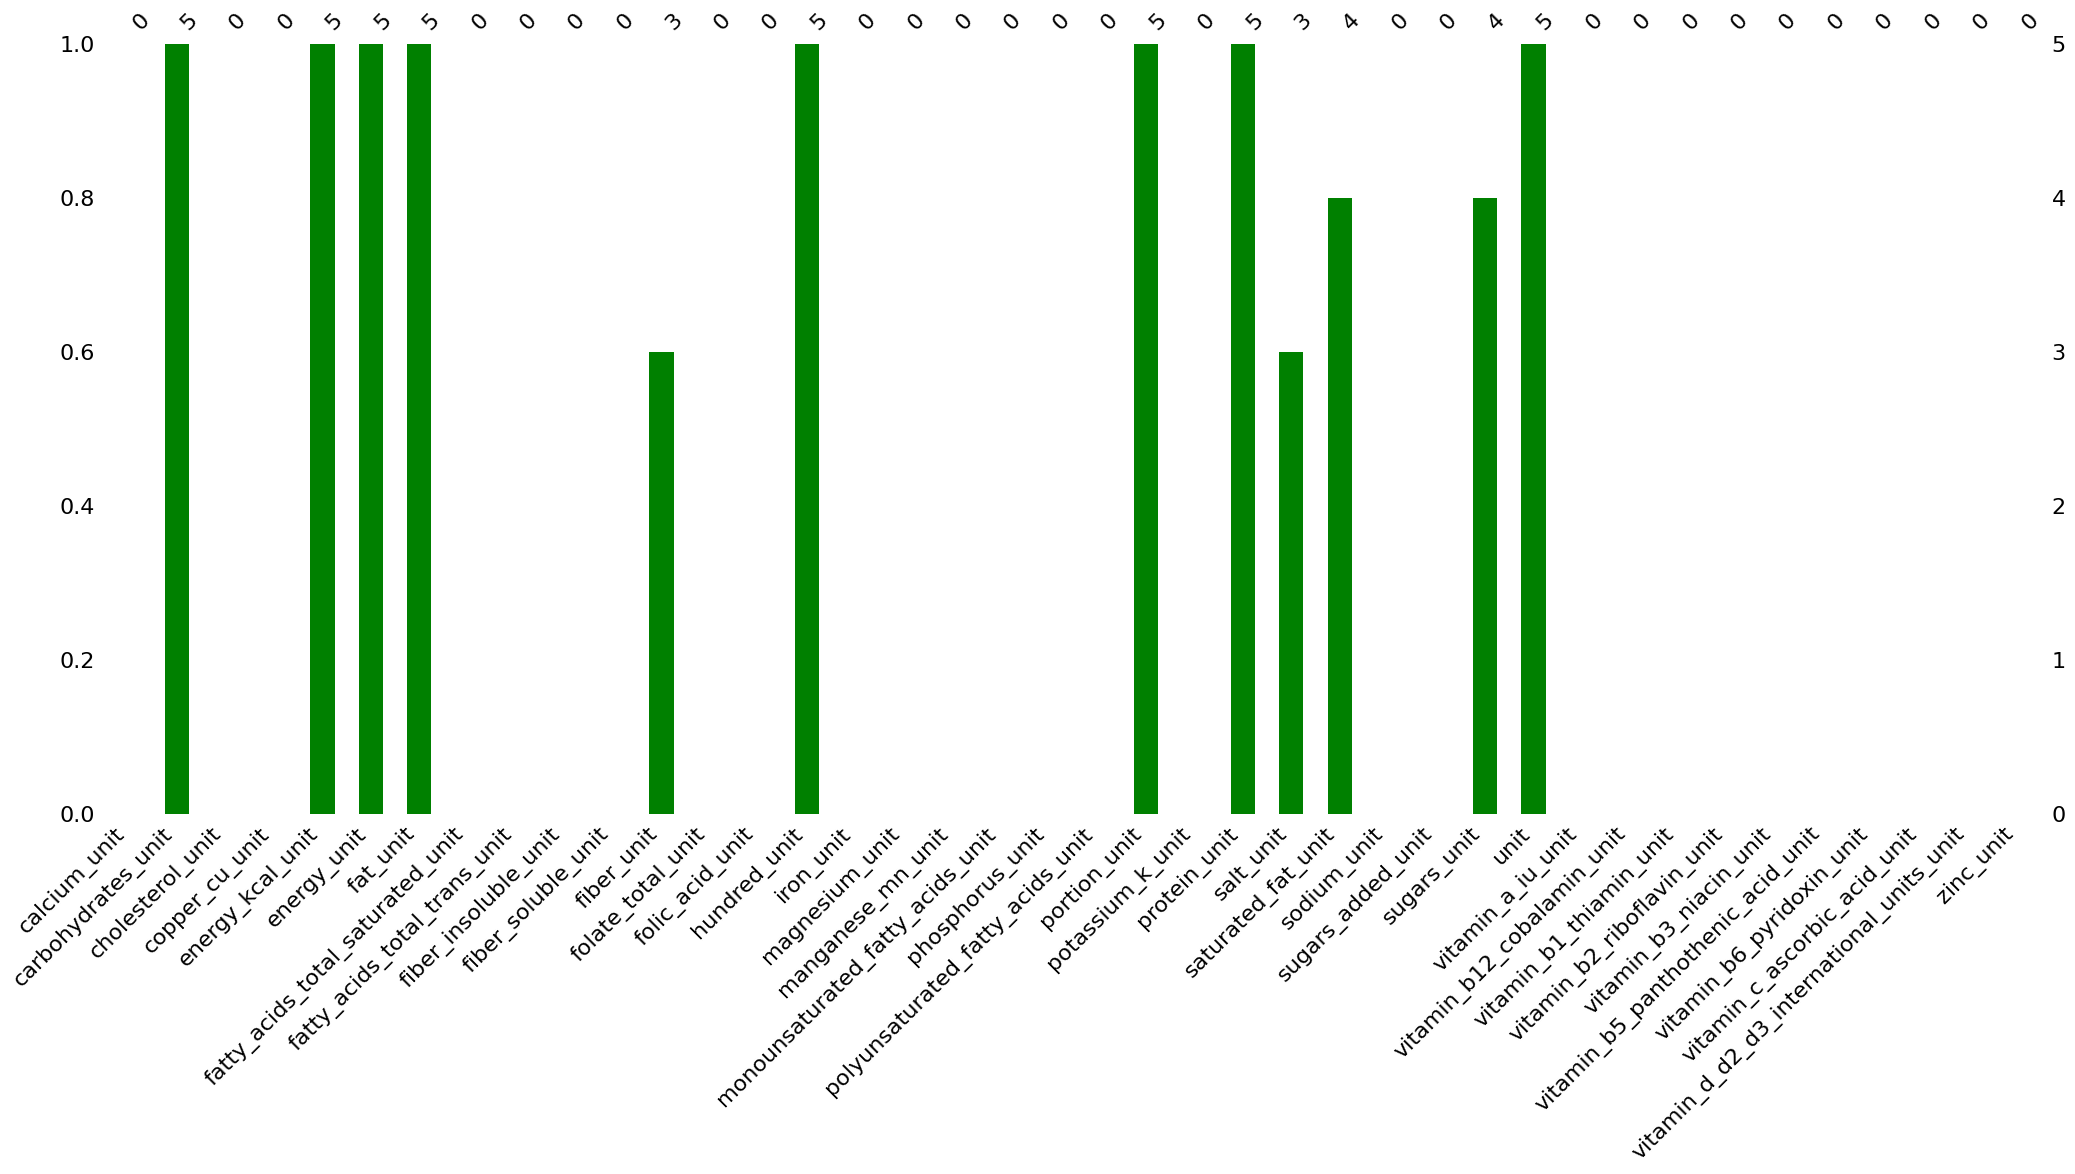

In [77]:
# visualizing the missing values using missingno. Start with unit suffix
import missingno as msno

msno.bar(unit.sample(5), color='green');  #Sample only accept values below missing. We won't drop any

#### Missingno: per_portion suffix columns

MissingNo sample (here is also 5) only accept values below missing. **We won't drop any** per_portion suffix column.

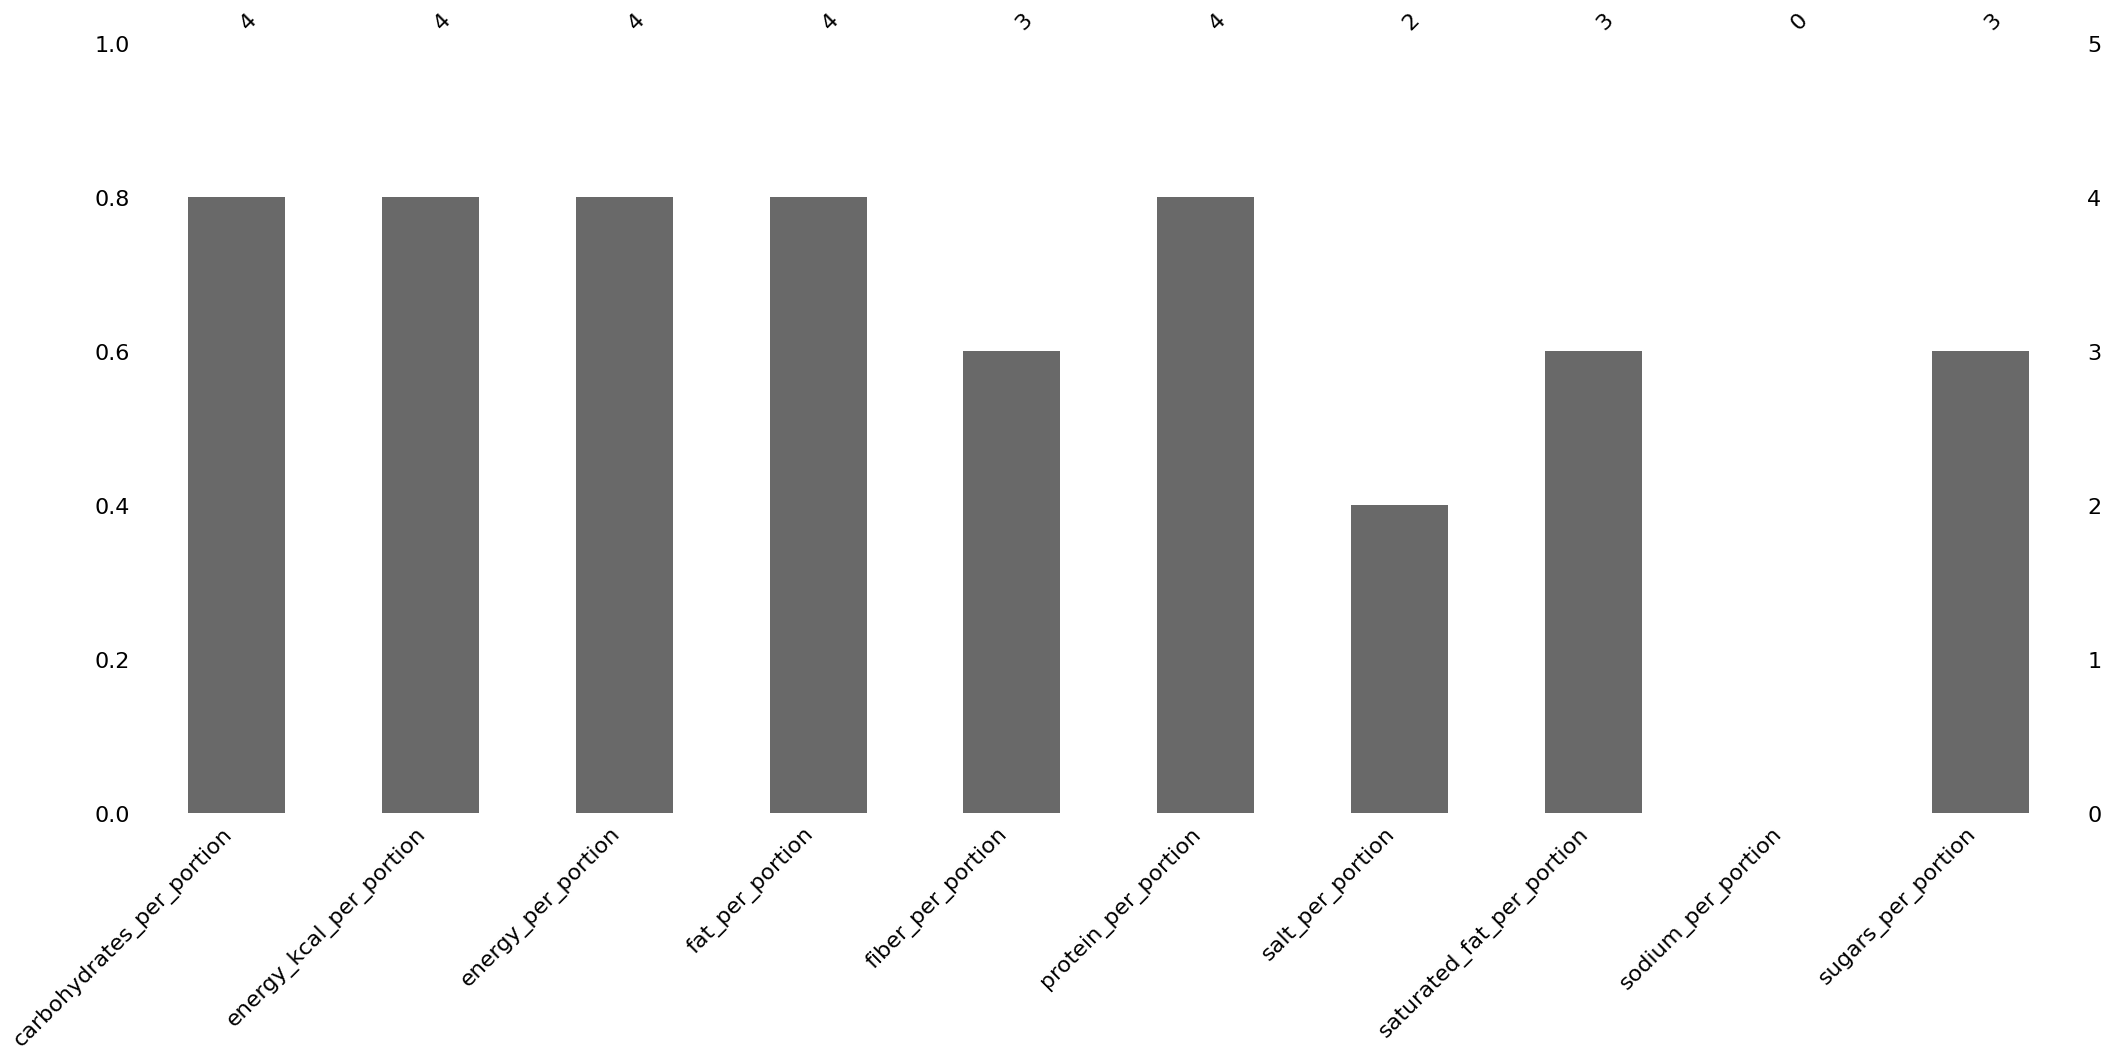

In [78]:
# visualizing the missing values using missingno
import missingno as msno

msno.bar(per_portion.sample(5));

#### MissingNo on other_cols (remaing list of columns).

MissingNo sample (here is 8) only accept values below missing. **We won't drop any** remaining column.

Sample value was changed, just to show that product_name_de (german products) and french products aren't empty.

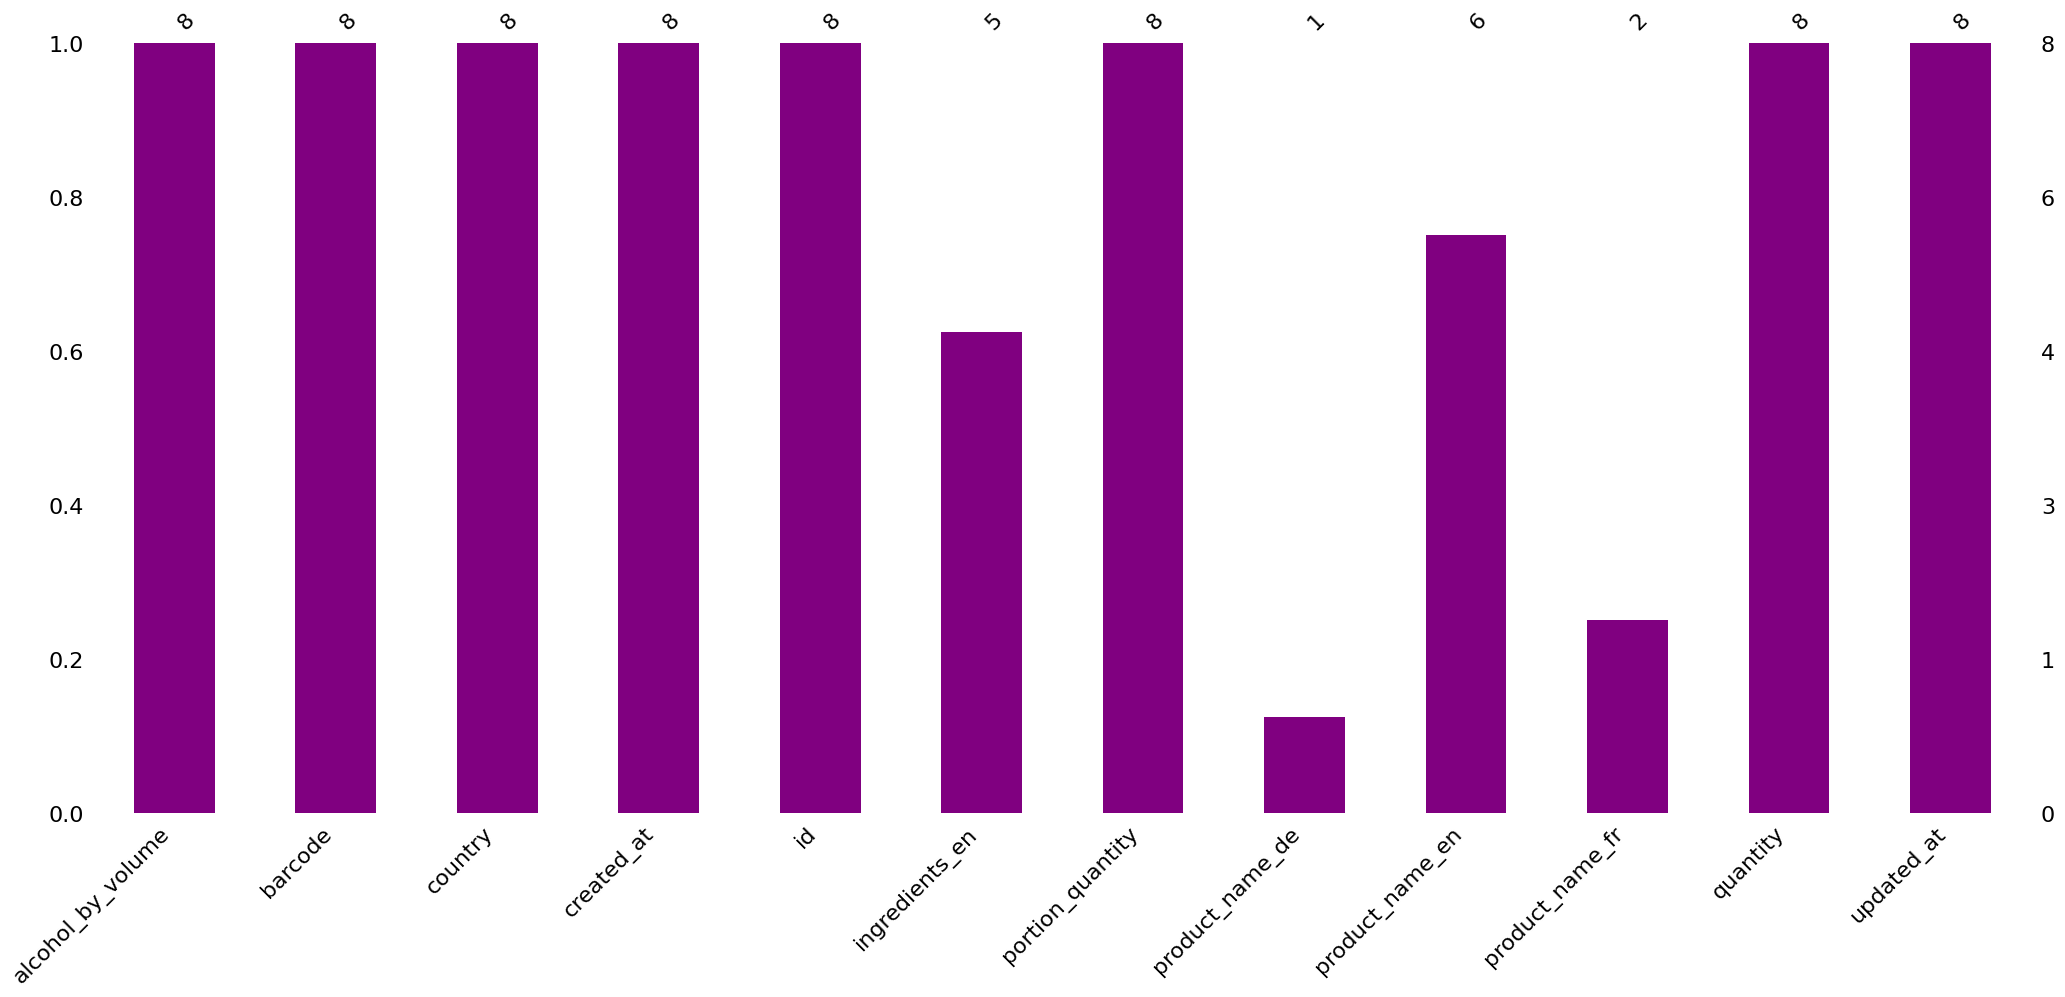

In [79]:
# visualizing the missing values using missingno
import missingno as msno

msno.bar(other_cols.sample(8), color='purple');  #I changed Sample just to show that product_name_de and fr aren't empty

## B3 b) Fill up missing values in categorical columns. Use the most frequent value.

"Start with your list of unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the unit columns."

#### New subdataframe with cols that had green bars on the MissingNo chart.

In [80]:
#After checking the green (by unit suffix) MissingNO. I created that sub-dataframe with the columns that show green bars.

unit = df[['calcium_unit', 'carbohydrates_unit', 'cholesterol_unit', 'copper_cu_unit', 'energy_kcal_unit', 'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit', 'fiber_insoluble_unit', 'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit', 'folic_acid_unit', 'hundred_unit', 'iron_unit', 'magnesium_unit', 'manganese_mn_unit', 'monounsaturated_fatty_acids_unit', 'phosphorus_unit', 'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit', 'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'unit', 'vitamin_a_iu_unit', 'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit', 'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit', 'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit', 'vitamin_c_ascorbic_acid_unit', 'vitamin_d_d2_d3_international_units_unit', 'zinc_unit']]

#### Fillna Unit suffix list with mode (most frequent)

You can use it to fill missing values for each column, using its own most frequent value, like this:

In [81]:
#StackOverflow https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

#Answered by Hellpanderr Sep 16, 2015 at 22:25

#Most frequent (mode) 

unit = unit.fillna(unit.mode().iloc[0])

### Missing values on unit columns after the imputation.  

Verify Missing values on unit columns after the imputation by the most frequent value.

The output shows that's no missing after the imputation.

In [82]:
#Show the rows that contain the missing values. 

unit[unit.isna().any(axis=1)]

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit


## B3 c) Fill up the missing values of a column using other columns that hold similar information.

"As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up."

#### Find columns that hold similar information: product_name_en (de and fr)

In [83]:
#Find columns that hold similar information
#New sub-dataframe

product_names = df[['product_name_en', 'product_name_de', 'product_name_fr']]
product_names.head(3)

,product_name_en,product_name_de,product_name_fr
0,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
2,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio


#### Report the number of rows that we managed to fill up.

In [84]:
#StackOverFlow https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe
#Answered by Gojandroo Oct 18, 2021 at 21:50

# TOTAL number of missing values:
#df.isna().sum().sum()


# number of ROWS with at least one missing value:
(product_names.isna().sum(axis=1) > 0).sum()


# number of COLUMNS with at least one missing value:
#(df.isna().sum(axis=0) > 0).sum()

365375

#### Below, the original code applied np.isnan since it doesn't work with object, change it to pd.isnull

In [85]:
#StackExchange https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe
#Answered by Icyblade answered Mar 22, 2017 at 13:15


#To fix with pd.isnull (instead of np.isnan)
#https://stackoverflow.com/questions/52657223/typeerror-ufunc-isnan-not-supported-for-the-input-types-and-the-inputs-could
#answered by Shreyas Menon Feb 22, 2022 at 18:54
#np.isnan won't work for object or string dtypes. Use pd.isnull, which should work in your case.


product_names = pd.DataFrame(
    np.array([[1, 2, 3], [4, 5, np.nan], [7, 8, 9], [3, 2, np.nan], [5, 6, np.nan]]), 
    columns=['product_name_de', 'product_name_fr', 'product_name_en']
)
product_names['product_name_en'] = product_names.apply(
    lambda row: row['product_name_de']*row['product_name_fr'] if pd.isnull(row['product_name_en']) else row['product_name_en'],
    axis=1
)

### Problem solved on product_names? Check below our missing values.

In [86]:
#Show the rows that contain the missing values. 

product_names[product_names.isna().any(axis=1)]

,product_name_de,product_name_fr,product_name_en


## B3 d) Fill up missing values based on common knowledge.

"As a third strategy, let’s fill up missing values based on common knowledge. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred."

In [87]:
ironP_hun = df['iron_per_hundred']
ironP_hun.head(2)

0   NaN
1   NaN
Name: iron_per_hundred, dtype: float64

### Percentage of missing values in iron_per_hundred

In [88]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
#Answered by Engineero Jun 27, 2018 at 20:37

#percentage of missing values in each column in the OpenFood dataset

percent_missing = ironP_hun.isnull().sum() * 100 / len(ironP_hun)
percent_missing

29.474450763436156

In [89]:
ironP_hun.isnull().sum()

110495

#### The iron_per_hundred has 110495 missing values, which means 29.47450763436156 percent.

### Interpolation
"Interpolation is a technique used to fill missing values based on the values of adjacent datapoints. This technique is mainly used in case of time series data or in situation where the missing data points are expected to vary smoothly or follow a certain trend. It is also used in cases where it is regularly sampled data."

https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62

In [90]:
#https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62

# Linear interpolation for a specific column
df['iron_per_hundred'].interpolate(method='linear', inplace=True)

# Linear interpolation for the entire DataFrame
#df.interpolate(method='linear', inplace=True)

#### I tried interpolation, however it didn't work cause I have remaining missing.

In [91]:
ironP_hun.isnull().sum()

20

#### Fill up these missing values with a forward and backward fill.

It's a desperate attempt cause bfill and ffill are used when we need to replace NaN values forward and backward filling.

In [92]:
#Deprecated fillna(method="ffill"). Just remove method=

df["iron_per_hundred"] = df["iron_per_hundred"].fillna("ffill").fillna("bfill")

#### At least, the output shows that there are no missing on iron_per_hundred.

In [93]:
df["iron_per_hundred"].isnull().sum()

0

I tried to **filter the products** that contain chocolate in the full data, and then **use the median value of iron** from chocolate products to fill in the missing of iron in chocolate products."

However, median didn't work. Besides, I'm pretty sure that isn't like what I wrote. Or even what is expected to deliver in this task.

#### Filter by columns value.

In [94]:
#Trying to filterproducts that have iron  https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/
#Didn't help: https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/


filtered_df = df.loc[df['product_name_en'] != 'COBBLESTONE BAKERY, RED VELVET TRUFFLES, CHOCOLATE COVERED']
filtered_df.head(2)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.0,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.5,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Imputation with mode

Imputation with mean/median didn't work below.

In [95]:
#StackOverflow https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

#Answered by Hellpanderr Sep 16, 2015 at 22:25

#mean/median imputation didn't work. I changed to mode

filtered_df = filtered_df.fillna(filtered_df.mode().iloc[0])

I will wait to read what would be the expected approach to fill with **"Common Knowledge".**

### B3 e) Replace Missing with a Certain term: ingredient_missing

"Another strategy for text-based columns is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing."

#### Fill up the missing values non numerical with the label 'ingredient_missing'
https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

In [96]:
# Fill up missing values in non-numerical columns
df['ingredients_en'] = df['ingredients_en'].fillna("ingredient_missing")

# Check for remaining missing values
df['ingredients_en'].isna().sum()

0

### Verifying if ingredient_missing replaced Nan

Verifying if ingredient_missing replaced Nan on the column ingredients_en.

That replacement, "saved" one more column (with more than 95%) of being dropped at the end of the whole task.

In [97]:
df['ingredients_en'].tail()

385379                                   ingredient_missing
385380                                   ingredient_missing
385381    cocoa mass, fat reduced cocoa, cocoa butter, d...
385382                                   ingredient_missing
385383                                   ingredient_missing
Name: ingredients_en, dtype: object

Above, it seems that ingredient_missing replaced successfully the Nan.

## B3 f) Drop feature that contains more than 95% nan values

"Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data. This amounts to about 5% of the data set. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?"

In [98]:
#That snippet I found on Advanced EDA resulted: (0, 99) No rows at all!

#df = df.dropna(thresh=df.shape[0] * 0.95, axis=0)
#df.shape

### Drop the columns that have more than 95% of missing values

In [99]:
#StackOverFlow https://stackoverflow.com/questions/45515031/how-to-remove-columns-with-too-many-missing-values-in-python
#Answered by Singmotor Jun 11, 2018 at 13:13

limitPer = len(df) * .95
df = df.dropna(thresh=limitPer, axis=1)

### Dropping duplicates/columns with more than 95% of missing values.

After dropping duplicates and columns that have more than 95% of missing values.

That's it??? Only (13) thirteen columns?

In [100]:
#Shape after cleaning data.

df.shape

(374884, 13)

### At the end, we have 374884 rows and 13 columns

#### I filled Nan with ingredient_missing
Check ingredients_en column

Why, BELOW,tail shows 385383 rows if the shape is 374884??

In [101]:
df.tail(2)

,alcohol_by_volume,barcode,country,created_at,hundred_unit,id,ingredients_en,iron_per_hundred,portion_quantity,portion_unit,quantity,unit,updated_at
385382,0.0,4044889004335,CH,2021-10-04T14:27:36.157Z,?,376942,ingredient_missing,2.1,0.0,?,0.0,?,2021-10-04T14:27:43.384Z
385383,0.0,7613379866622,CH,2021-10-04T16:10:49.085Z,?,376943,ingredient_missing,2.1,0.0,?,0.0,?,2021-10-04T16:10:52.218Z


<h1><span class="label label-default" style="background-color:black;border-radius:100px 100px; font-weight: bold; font-family:Garamond; font-size:20px; color:#03e8fc; padding:10px">That's how it ends??? Only 13 columns</span></h1><br>